## Fitness Trackers Products Ecommerce

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/var/folders/0y/xzwy9cz54g9b7ghtkf3shzlh0000gn/T/ipykernel_71459/276062395.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [15]:
df = pd.read_csv('./Datasets/smartwatches.csv')
df.head()

Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   
2        NaN         NaN        Silicon         Yes                  8.0   
3        NaN         NaN        Silicon         Yes                  3.5   
4        NaN         NaN          Other         Yes                  8.0   

  Bluetooth Display Size     Weight  
0       Yes          NaN  35 - 50 g  
1       Yes   1.8 inches  50 - 75 g  
2       Yes   1.7 inches  35 - 50 g  
3       Yes   1.8 inches      75g +  
4       Yes   1.7 inches  35 - 50 g

## Perform EDA on dataset:-

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(450, 16)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           450 non-null    int64  
 1   Brand                450 non-null    object 
 2   Current Price        440 non-null    float64
 3   Original Price       377 non-null    float64
 4   Discount Percentage  377 non-null    float64
 5   Rating               444 non-null    float64
 6   Number OF Ratings    391 non-null    float64
 7   Model Name           415 non-null    object 
 8   Dial Shape           327 non-null    object 
 9   Strap Color          327 non-null    object 
 10  Strap Material       381 non-null    object 
 11  Touchscreen          413 non-null    object 
 12  Battery Life (Days)  418 non-null    float64
 13  Bluetooth            444 non-null    object 
 14  Display Size         420 non-null    object 
 15  Weight               264 non-null    obj

In [23]:
train_df = df.sample(frac=0.75,random_state=42)
train_df = train_df.reset_index()
train_df.shape

(338, 17)

In [21]:
test_df = df.drop(train_df.index)
test_df.shape

(112, 16)

In [22]:
train_df.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price            6
Original Price          54
Discount Percentage     54
Rating                   4
Number OF Ratings       39
Model Name              29
Dial Shape              95
Strap Color             95
Strap Material          53
Touchscreen             29
Battery Life (Days)     28
Bluetooth                5
Display Size            27
Weight                 139
dtype: int64

#### Handling null values:-

In [34]:
numerical_data = [features for features in train_df.columns if train_df[features].dtype != 'object']
continous_data = [features for features in train_df.columns if train_df[features].dtype == 'object']

In [35]:
train_df[numerical_data].describe()

index  Unnamed: 0  Current Price  Original Price  \
count  338.000000  338.000000     332.000000      284.000000   
mean   222.378698  222.378698   12582.557229    14412.894366   
std    129.964655  129.964655   17140.723212    15738.088443   
min      0.000000    0.000000    1199.000000     1669.000000   
25%    111.250000  111.250000    2126.000000     5999.000000   
50%    222.500000  222.500000    3999.000000     7994.500000   
75%    334.750000  334.750000   17121.750000    17996.000000   
max    448.000000  448.000000   98990.000000    96390.000000   

       Discount Percentage      Rating  Number OF Ratings  Battery Life (Days)  
count           284.000000  334.000000         299.000000           310.000000  
mean             48.352394    4.018263       10654.331104            14.125968  
std              24.595508    0.559382       28059.216117             7.647207  
min             -79.688436    1.000000           1.000000             0.750000  
25%              33.177427    3.900000          51.500000             8.000000  
50%              54.785578    4.100000         717.000000            17.500000  
75%              66.677780    4.300000        7247.000000            22.000000  
max              91.004550    5.000000      275607.000000            22.000000

In [36]:
train_df[categorical_data].describe()

Brand Model Name Dial Shape Strap Color Strap Material  \
count          338        309        243         243            285   
unique          18        292          6          27             14   
top     fire-boltt       ring     Circle       Black        Silicon   
freq            42          4         98          97            187   

       Touchscreen Bluetooth Display Size Weight  
count          309       333          311    199  
unique           2         2           32      5  
top            Yes       Yes   1.7 inches  75g +  
freq           293       330           54     57

In [37]:
train_df[numerical_data].skew()

index                  0.016271
Unnamed: 0             0.016271
Current Price          2.317823
Original Price         2.795112
Discount Percentage   -0.998131
Rating                -1.591881
Number OF Ratings      5.454200
Battery Life (Days)   -0.174694
dtype: float64

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


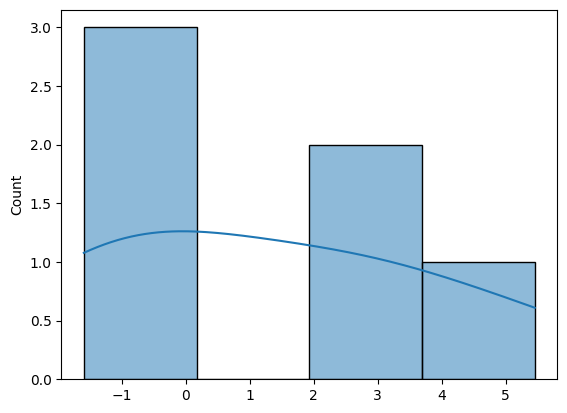

In [81]:
sns.histplot(train_df[numerical_data].skew(),kde=True)
plt.show()

In [48]:
import ydata_profiling as pp

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

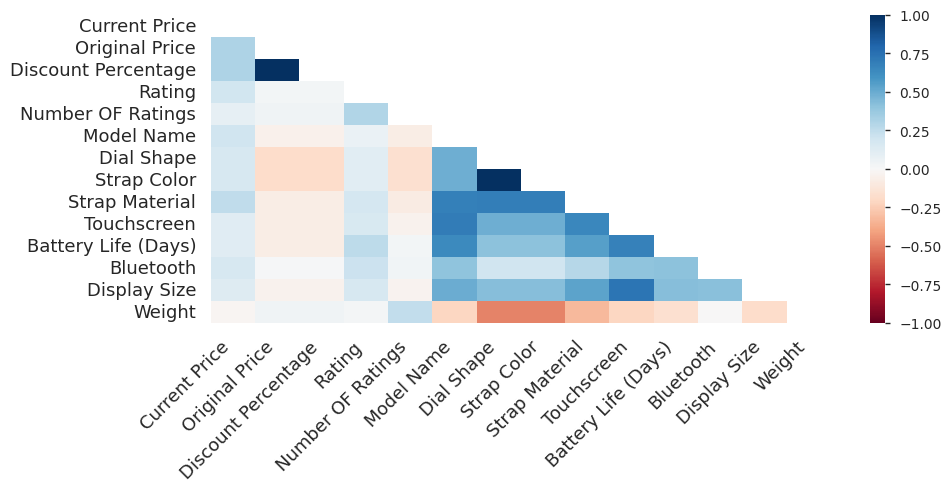

In [49]:
pp.ProfileReport(train_df)

### Data vizulation

In [57]:
numerical_data.remove('index')
numerical_data.remove('Unnamed: 0')

In [58]:
numerical_data

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_ol

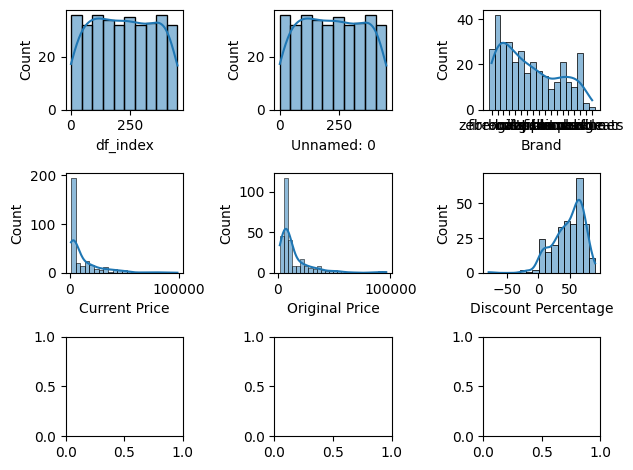

In [98]:
num_rows = len(numerical_data) // 3 + 1
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols)
for i,column in enumerate(numerical_data):
    row = i//3
    col = i%3
    ax = axes[row,col]
    sns.histplot(data = train_df[column],ax=ax,kde=True)
plt.tight_layout() 
plt.show()

In [101]:
# num_rows = len(numerical_data) // 3 + 1
# num_cols = 3
# fig, axes = plt.subplots(num_rows, num_cols)
# for i,column in enumerate(numerical_data):
#     row = i//3
#     col = i%3
#     ax = axes[row,col]
#     sns.boxplot(data = train_df[column],ax=ax)
# plt.tight_layout() 
# plt.show()

***

***

## Polynomial Regression:-

In [4]:
X = 6 * np.random.rand(100,1)-3
y = 0.5*X**2 +1.5*X + 2 + np.random.randn(100,1)

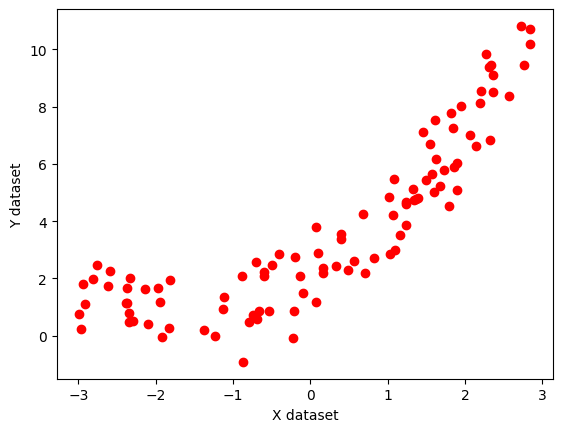

In [13]:
plt.scatter(X,y,color='red')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [20]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression_1.predict(X_test))
score

0.7815618710487084

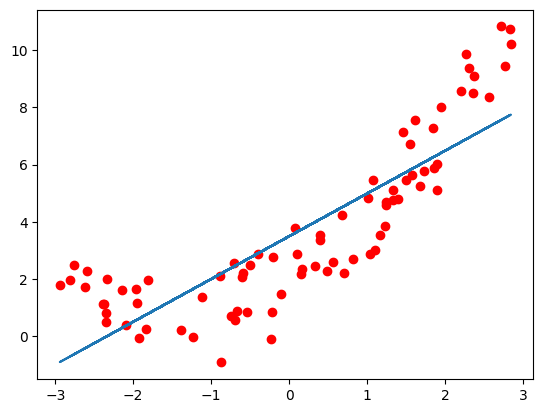

In [24]:
plt.plot(X_train,regression_1.predict(X_train))
plt.scatter(X_train,y_train,color = 'r')

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [27]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8895338601588448


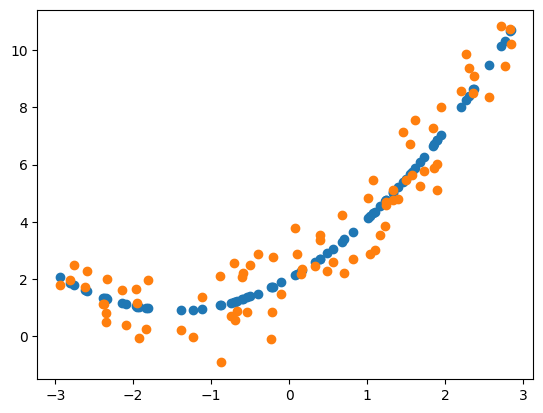

In [30]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [32]:
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [33]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8867673045512375


In [37]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)

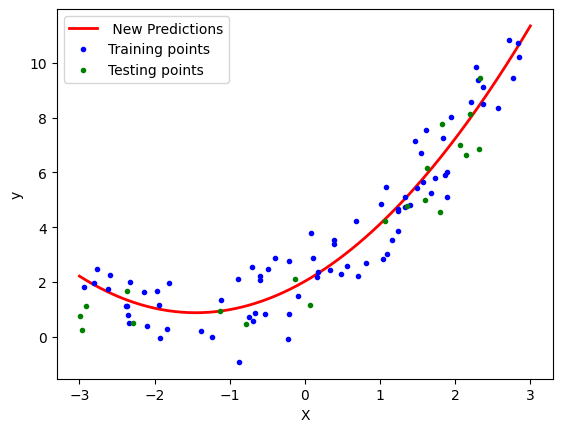

In [38]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

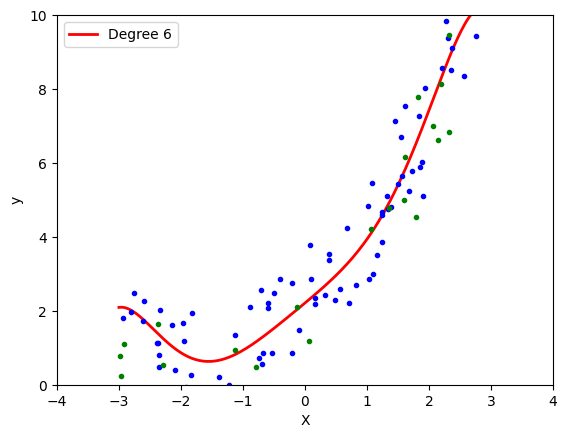

In [41]:
poly_regression(6)

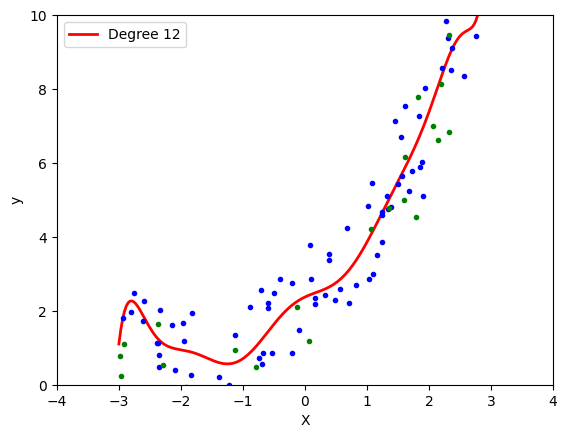

In [42]:
poly_regression(12)